# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Skopje, None, North Macedonia**, or **North Macedonia** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Skopje, None, North Macedonia** to Ann Arbor, USA. In that case at least one source file must be about **Skopje, None, North Macedonia**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Skopje, None, North Macedonia** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data is sourced from here: https://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-812554_QID_-36E8C8C8_UID_-3F171EB0&layout=FREQUENC,L,X,0;GEO,L,Y,0;TIME,C,Z,0;ISCED11,L,Z,1;AGE,L,Z,2;SEX,L,Z,3;UNIT,L,Z,4;ACL00,L,Z,5;INDICATORS,C,Z,6;&zSelection=DS-812554TIME,2015;DS-812554AGE,Y_GE16;DS-812554UNIT,PC;DS-812554INDICATORS,OBS_FLAG;DS-812554ACL00,AC525;DS-812554ISCED11,TOTAL;DS-812554SEX,T;&rankName1=ISCED11_1_2_-1_2&rankName2=UNIT_1_2_-1_2&rankName3=AGE_1_2_-1_2&rankName4=INDICATORS_1_2_-1_2&rankName5=SEX_1_2_-1_2&rankName6=TIME_1_0_1_0&rankName7=ACL00_1_2_1_0&rankName8=FREQUENC_1_2_0_0&rankName9=GEO_1_2_0_1&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=true&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23&eub_bm:ilc_scp03$DV_551&lang=en

In [74]:
euro_data = pd.read_csv('eurostat_data.csv')

# Create a group for ex-Yugoslav countries
ex_yu = ['Croatia', 'Serbia', 'North Macedonia', 'Slovenia']

# Filter out the variables that we don't need
# We just want all sexes and all education levels, broken down by age and by country
# And also look for those who have attended a sports event at least once

df = euro_data[euro_data['SEX'] == 'Total']
df = df[df['GEO'].isin(ex_yu)]
df = df[df['FREQUENC'] == 'At least once']
df = df[df['ISCED11'] == 'All ISCED 2011 levels ']

# Tidying up to remove unnecessary columns 
df.drop(['UNIT', 'SEX', 'ACL00', 'Flag and Footnotes', 'TIME', 'FREQUENC', 'ISCED11'], axis = 1, inplace = True)

# Making sure we can actually work with the values - strings are useless for plotting
df['Value'] = df['Value'].astype(float)
# Using disjoint and most representative age groups
cols_to_use = ['From 16 to 24 years', 'From 25 to 34 years', 'From 35 to 49 years', 'From 50 to 64 years']
df = df[df['AGE'].isin(cols_to_use)]

df.reset_index()
df

,GEO,AGE,Value
8856,Croatia,From 16 to 24 years,52.8
8865,Croatia,From 25 to 34 years,42.0
8871,Croatia,From 35 to 49 years,30.3
8874,Croatia,From 50 to 64 years,16.6
10260,Slovenia,From 16 to 24 years,47.4
10269,Slovenia,From 25 to 34 years,38.5
10275,Slovenia,From 35 to 49 years,37.2
10278,Slovenia,From 50 to 64 years,25.7
11124,North Macedonia,From 16 to 24 years,40.0
11133,North Macedonia,From 25 to 34 years,29.3


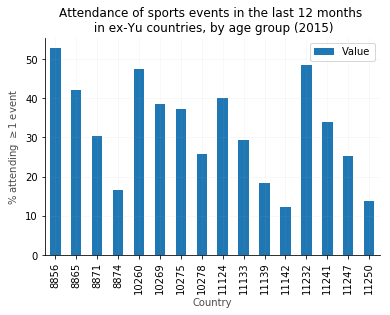

In [81]:
df['Value'].plot(
    kind = 'bar', 
    stacked = False
)

plt.xlabel("Country", alpha = 0.7)
plt.ylabel("% attending $\geq 1$ event", alpha = 0.5)
plt.legend(loc = 'best')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax1 = plt.gca()
ax1.grid(True, alpha = 0.1)

plt.title('Attendance of sports events in the last 12 months \n in ex-Yu countries, by age group (2015)')
plt.show()


OK, not exactly what we want. Now, we want to put the age groups as column variables and just have 4 rows to work with - one for each country. Then, we can go ahead and plot the column charts.

In [125]:
my_table = df.pivot_table(index = ['GEO'], values = ['Value'], columns = ['AGE'])

new_col_names = {'From 16 to 24 years':'16-24', 'From 25 to 34 years':'25-34', 
              'From 35 to 49 years':'35-49', 'From 50 to 64 years':'50-64',
             'From 65 to 75 years':'65-74', '75 years or over':'75+'}

my_table = my_table.rename(columns = new_col_names)
# sort values by what the youngest generation is doing
my_table = my_table.reindex(my_table['Value'].sort_values(by='16-24', ascending=False).index)
my_table

Value                  
AGE             16-24 25-34 35-49 50-64
GEO                                    
Croatia          52.8  42.0  30.3  16.6
Serbia           48.5  34.0  25.2  13.9
Slovenia         47.4  38.5  37.2  25.7
North Macedonia  40.0  29.3  18.4  12.3

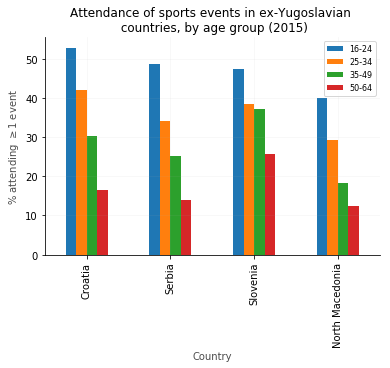

In [133]:

my_plot = my_table['Value'].plot(
    kind = 'bar', 
    stacked = False,
)

plt.xlabel("Country", alpha = 0.7)
plt.ylabel("% attending $\geq 1$ event", alpha = 0.7)

plt.legend(loc = 'best', fontsize = 8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax1 = plt.gca()
ax1.grid(True, alpha = 0.1)

plt.title('Attendance of sports events in ex-Yugoslavian \n countries, by age group (2015)')

plt.show()

The second dataset we'll use is the private spending of households on sports, with 2015 as a baseline year. The data can be found here: https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_aind/default/table?lang=en

In [152]:
df2 = pd.read_excel('ec_data.xlsx')
df2 = df2[df2['TIME'].isin(ex_yu)]
df2.set_index(['TIME'])

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
TIME,,,,,,,,,,
Croatia,97.76,100.04,100.26,100.0,99.37,100.67,102.23,103.04,103.06,105.82
Slovenia,98.50,100.40,100.77,100.0,99.85,101.40,103.36,105.11,104.82,106.97
North Macedonia,97.26,99.91,99.87,100.0,100.24,102.35,104.66,105.42,106.73,110.36
Serbia,89.40,96.30,98.50,100.0,101.30,104.70,106.80,108.80,110.7,115.2


In [175]:
# Take the rows of each dataset to be the timeseries
croatia = df2.iloc[0, 1:]
slovenia = df2.iloc[1, 1:]
macedonia = df2.iloc[2,1:]
serbia = df2.iloc[3, 1:]

macedonia

2012     97.26
2013     99.91
2014     99.87
2015       100
2016    100.24
2017    102.35
2018    104.66
2019    105.42
2020    106.73
2021    110.36
Name: 39, dtype: object

In [176]:
# Take the names of the columns to be the axis labels
labels = list(df2.columns.values)[1:]
labels

['2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

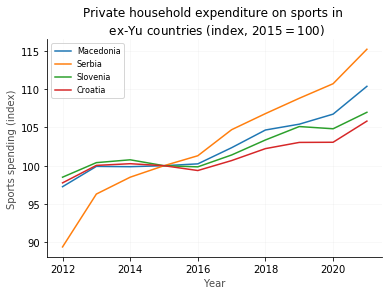

In [188]:
plt.plot(labels, macedonia, label = 'Macedonia')
plt.plot(labels, serbia, label = 'Serbia')
plt.plot(labels, slovenia, label = 'Slovenia')
plt.plot(labels, croatia, label = 'Croatia')
plt.legend(loc = 'best')

plt.xlabel("Year", alpha = 0.7)
plt.ylabel("Sports spending (index)", alpha = 0.7)

plt.legend(loc = 'best', fontsize = 8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax2 = plt.gca()
ax2.grid(True, alpha = 0.1)

plt.title('Private household expenditure on sports in \n ex-Yu countries (index, $2015 = 100$)')
plt.show()